Load lib

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
cd /gdrive/My\ Drive/nn 

/gdrive/My Drive/nn


In [4]:
%tensorflow_version 1.x
import argparse
import os
import pickle
import sys
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
mpl.use('Agg')
%matplotlib inline

import numpy as np

np.random.seed(7)  # for reproducibility

import tensorflow as tf
tf.random.set_random_seed(5005)

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import class_weight


from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.pooling import MaxPooling1D
from tensorflow.python.keras.layers.pooling import AveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.python.keras.backend as K
from keras import regularizers
from tensorflow.python.keras.utils import plot_model 

sys.path.append(".")
import utils
from utils import *

l2_lam = 5e-07 
l1_lam = 1e-08 

TensorFlow 1.x selected.


Using TensorFlow backend.


Run the different functions

In [5]:
zhou_models_folder="./models/folds_models/covariance/5-folds"
sc_models_folder="./models/folds_models/sc/5-folds"

scgwbs_data = r"dataset/scwgbs_crc01_dataset/scwgbs1_crc01.pkl"
zhou_all_data = r"dataset/covariance/bulk_prone_0.0153/bulk.pkl"

# Get heatmap of scores

In [6]:
import pandas as pd 
import numpy as np
from utils import *
data = pd.read_pickle("dataset/all_options/zhou_all_options_valid_cpg.pkl")
test_data = data[data["orig_meth"] >= 0.7]
test_data["ccpg"] = test_data["sequence"].str.count("CG")
test_data =  test_data[test_data["ccpg"] <=3]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
X_test_seq = np.array([seq_to_mat(seq) for seq in test_data["sequence"]])

In [8]:
zhou_models = load_models(zhou_models_folder)
y_pred =  predict(zhou_models, X_test_seq)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
test_data["pred"] = y_pred

Text(0, 0.5, 'Covariance')

<Figure size 1200x800 with 0 Axes>

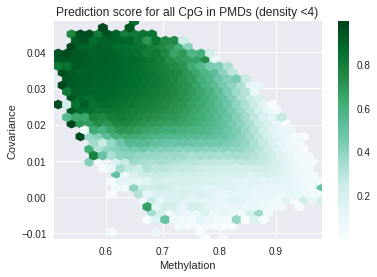

In [14]:
plt.figure(1, dpi=200)
test_data.plot.hexbin(x='meth', y='coveriance', C='pred', reduce_C_function=np.mean, gridsize=30, sharex=False,ylim=(test_data["coveriance"].min(), test_data["coveriance"].max()), xlim=(test_data["meth"].min(), test_data["meth"].max()))
plt.title("Prediction score for all CpG in PMDs (density <4)")
plt.xlabel("Methylation")
plt.ylabel("Covariance")

Text(0, 0.5, 'Covariance')

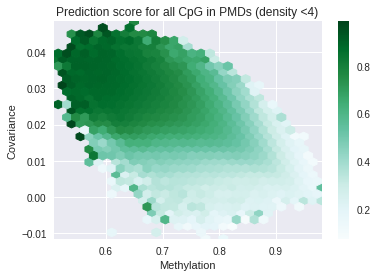

In [13]:
sc_models = load_models(sc_models_folder)
sc_y_pred =  predict(sc_models, X_test_seq)
test_data["sc_pred"] = sc_y_pred

plt.figure(1, dpi=200)
test_data.plot.hexbin(x='meth', y='coveriance', C='sc_pred', reduce_C_function=np.mean, gridsize=30, sharex=False,ylim=(test_data["coveriance"].min(), test_data["coveriance"].max()), xlim=(test_data["meth"].min(), test_data["meth"].max()))
plt.title("Prediction score for all CpG in PMDs (density <4)")
plt.xlabel("Methylation")
plt.ylabel("Covariance")

In [ ]:
data = pd.read_pickle("dataset/all_options/scwgbs_valid_cpg_df_crc01.pkl")
test_data = data[data["orig_meth"] >= 0.7]
test_data["ccpg"] = test_data["sequence"].str.count("CG")
test_data =  test_data[test_data["ccpg"] <=3]

X_test_seq = np.array([seq_to_mat(seq) for seq in test_data["sequence"]])
zhou_models = load_models(zhou_models_folder)
y_pred =  predict(zhou_models, X_test_seq)
test_data["pred"] = y_pred


sc_models = load_models(sc_models_folder)
sc_y_pred =  predict(sc_models, X_test_seq)
test_data["sc_pred"] = sc_y_pred

Text(0, 0.5, 'Prediction')

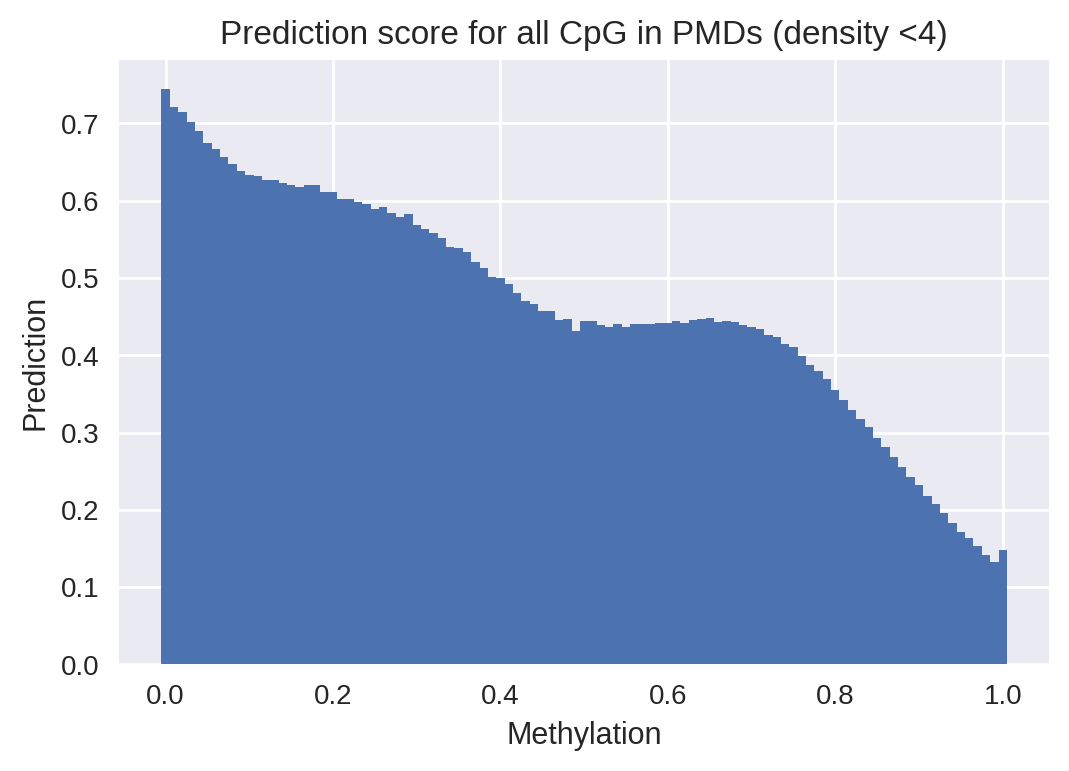

In [39]:
x = np.arange(0,1.01,0.01)
y_zhou_pred = []
y_bian_pred = []
for i in x:
    temp_df = test_data[np.logical_and(test_data["meth"] >=i, test_data["meth"]<i+0.01)]
    y_zhou_pred.append(np.mean(temp_df["pred"]))
    y_bian_pred.append(np.mean(temp_df["sc_pred"]))

plt.figure(1, dpi=200)
plt.bar(x,y_zhou_pred, width=0.01)
plt.title("Prediction score for all CpG in PMDs (density <4)")
plt.xlabel("Methylation")
plt.ylabel("Prediction")


Text(0, 0.5, 'Prediction')

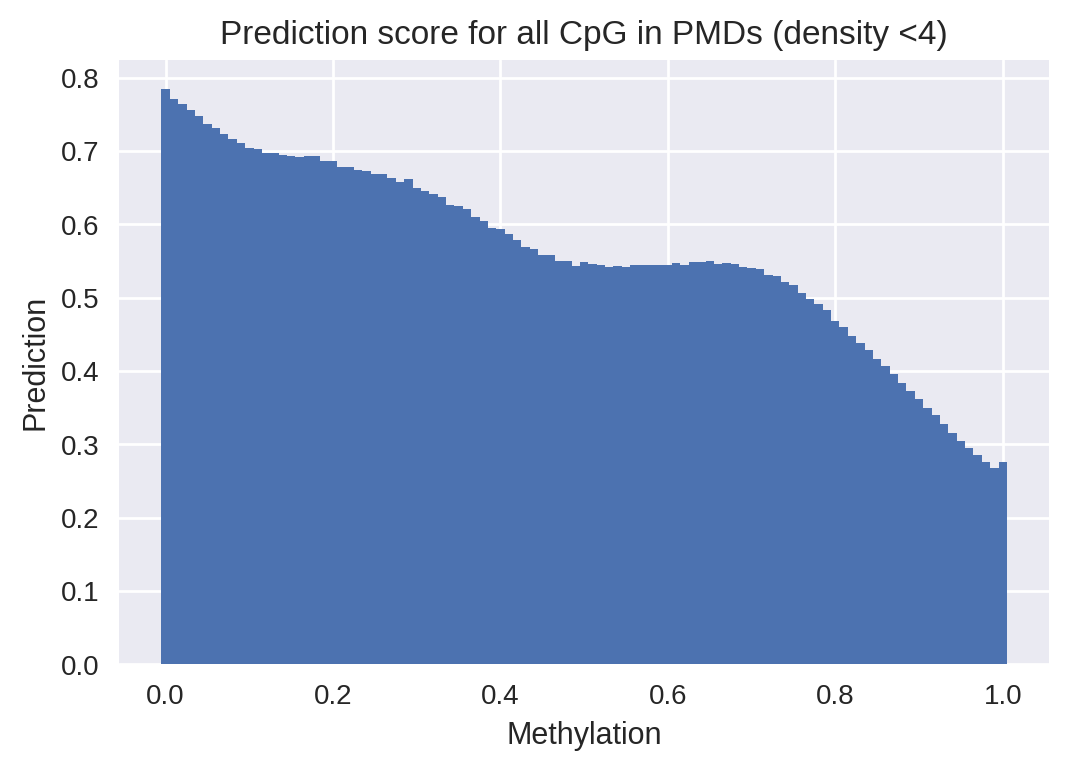

In [40]:

plt.figure(1, dpi=200)
plt.bar(x,y_bian_pred, width=0.01)
plt.title("Prediction score for all CpG in PMDs (density <4)")
plt.xlabel("Methylation")
plt.ylabel("Prediction")

#All CPgs

In [ ]:
zhou_models = load_models(zhou_models_folder)

In [ ]:
import pandas as pd
import os 
from utils import *
cd location_seq

for csv_path in os.listdir():
  print(csv_path)
  data = pd.read_csv(csv_path)
  data["ccpg"] = data["sequences"].str.count("CG")
  data_to_work = data[data["ccpg"] < 4]
  x_test_seq = np.array([seq_to_mat(seq) for seq in data_to_work["sequences"]])
  y_pred = predict(zhou_models, x_test_seq)
  new_df = pd.DataFrame()
  new_df["location"] = data_to_work["location"]
  new_df["prediction"] = y_pred
  new_df.to_csv("pred_%s" % csv_path)